# Maximum Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,198.478760,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,204.280457,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,204.871445,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,205.935257,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.004639,25587400


In [3]:
n = 14
df['Maximum_Price'] = df['Adj Close'].rolling(14).max()

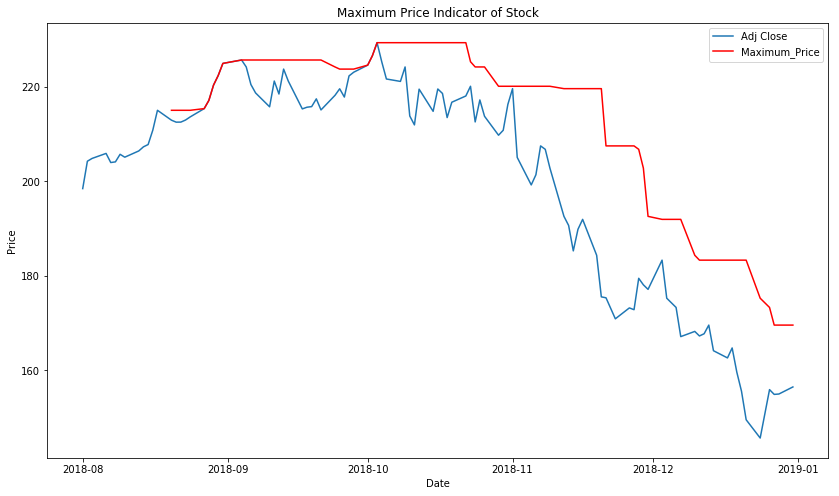

In [4]:
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.plot(df['Maximum_Price'], color='red')
plt.title('Maximum Price Indicator of Stock')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Candlestick with Maximum Price

In [5]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Maximum_Price,VolumePositive
0,736907.0,199.130005,201.759995,197.309998,201.500000,198.478760,67935700,NaN,False
1,736908.0,200.580002,208.380005,200.350006,207.389999,204.280457,62404000,NaN,True
2,736909.0,207.029999,208.740005,205.479996,207.990005,204.871445,33447400,NaN,False
3,736912.0,208.000000,209.250000,207.070007,209.070007,205.935257,25425400,NaN,False
4,736913.0,209.320007,209.500000,206.759995,207.110001,204.004639,25587400,NaN,False


Text(0.5,0,'Date')

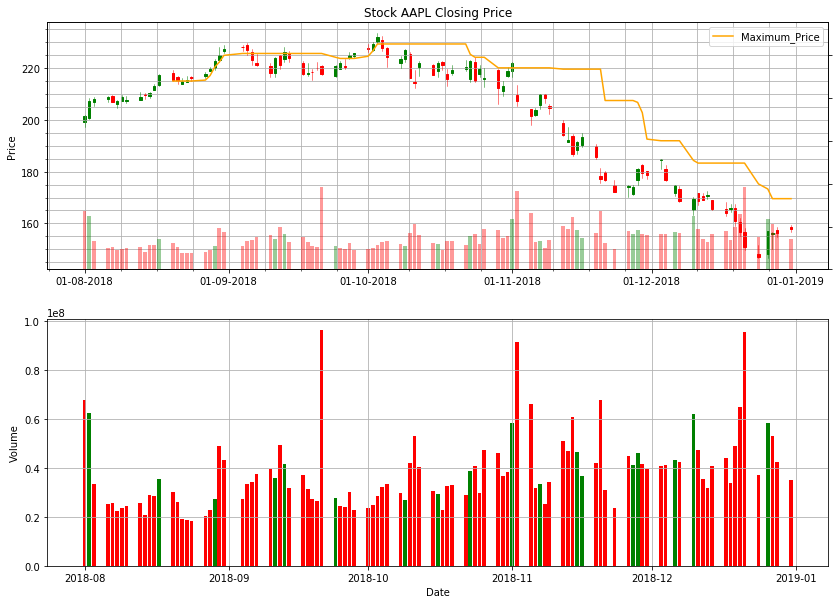

In [6]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['Maximum_Price'], color='orange')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend()

ax2 = plt.subplot(2, 1, 2)
df['VolumePositive'] = df['Open'] < df['Adj Close']
ax2.bar(df.index, df['Volume'], color=df.VolumePositive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')